In [1]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np

In [2]:
import seaborn as sns
sns.set_style('whitegrid') # give us nice whitegrid background
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from pandas.io.data import DataReader

/Users/ugurcanaytar/anaconda/lib/python2.7/site-packages/pandas/io/data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [4]:
from datetime import datetime

In [5]:
from __future__ import division

In [6]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN'] # apple, google, microsoft, amazon

In [7]:
end = datetime.now()
start = datetime(end.year-1, end.month, end.day) #startdate = 1 year ago

In [8]:
for stock in tech_list:
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [9]:
# RHS = DataReader takes stock ticker, yahoo finance website parameter, start and end dates
# globals() = taking that stock tickers and making them to global variable

In [10]:
AAPL.head() #because of globals(), that function do that

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-08-18,116.430000,117.440002,116.010002,116.500000,34560700,114.061260
2015-08-19,116.099998,116.519997,114.680000,115.010002,47445700,112.602453
2015-08-20,114.080002,114.349998,111.629997,112.650002,68501600,110.291855
2015-08-21,110.430000,111.900002,105.650002,105.760002,128275500,103.546087
2015-08-24,94.870003,108.800003,92.000000,103.120003,162206300,100.961352


In [11]:
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,105.113373,106.146706,104.061905,105.122778,4.463367e+07,103.734542
std,8.333551,8.358571,8.241827,8.290307,1.997203e+07,7.787899
min,90.000000,91.669998,89.470001,90.339996,1.304640e+07,89.853242
25%,97.215000,98.205000,96.427500,97.137499,3.167515e+07,96.300820
50%,105.550000,106.475002,104.849998,105.775002,3.971125e+07,104.469563
75%,111.757500,112.589998,110.282498,111.905001,5.231265e+07,109.792827
max,123.129997,123.820000,121.620003,122.570000,1.622063e+08,120.004194


In [12]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2015-08-18 to 2016-08-16
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Volume       252 non-null int64
Adj Close    252 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


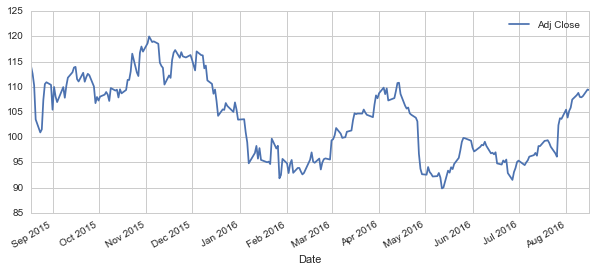

In [13]:
AAPL['Adj Close'].plot(legend = True, figsize = (10,4))  #pandas method plot()
# legend = info at right sides, figsize to see clear graph

In [14]:
# pandas good at financial analysis

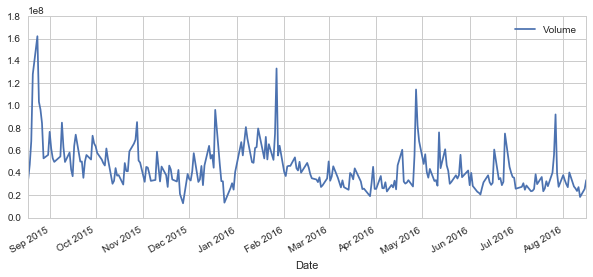

In [15]:
AAPL['Volume'].plot(legend = True, figsize = (10,4))

In [16]:
ma_day = [10,20,50] # moving averages over days

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = pd.rolling_mean(AAPL['Adj Close'], ma) #Adj close average over 10,20,50 days

/Users/ugurcanaytar/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
/Users/ugurcanaytar/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
/Users/ugurcanaytar/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()


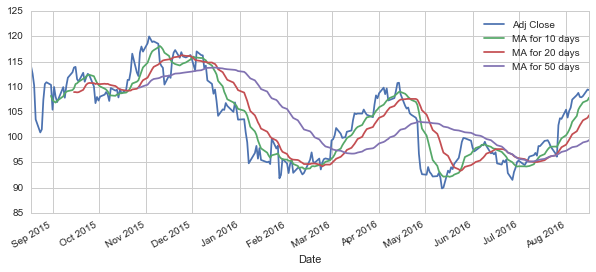

In [17]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots = False,
                                                                              figsize = (10,4))

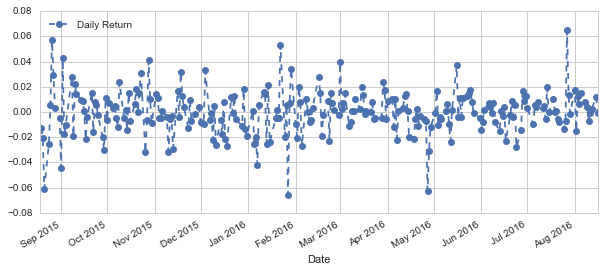

In [18]:
# daily returns and risk of the stock:

AAPL['Daily Return'] = AAPL['Adj Close'].pct_change() #percent change of adj closing price

AAPL['Daily Return'].plot(figsize = (10,4), legend = True, linestyle = '--', marker = 'o')

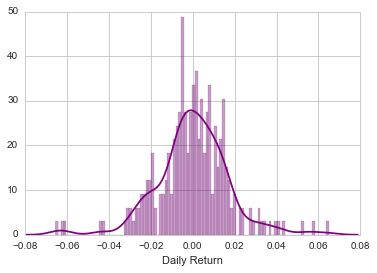

In [19]:
sns.distplot(AAPL['Daily Return'].dropna(), bins = 100, color = 'purple') # + KDE plot ~ seaborn way

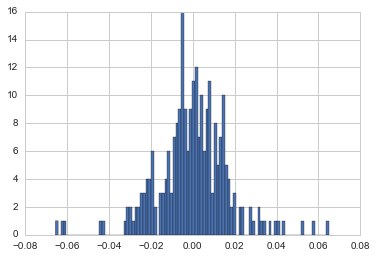

In [20]:
AAPL['Daily Return'].hist(bins = 100) #only histogram ~ pandas way

In [21]:
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

In [22]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-08-18,114.061260,535.020020,656.130005,46.008243
2015-08-19,112.602453,532.919983,660.900024,45.365860
2015-08-20,110.291855,515.780029,646.830017,44.441217
2015-08-21,103.546087,494.470001,612.479980,41.920351
2015-08-24,100.961352,463.369995,589.609985,40.567454


In [23]:
tech_rets = closing_df.pct_change()

In [24]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-08-18,NaN,NaN,NaN,NaN
2015-08-19,-0.012790,-0.003925,0.007270,-0.013962
2015-08-20,-0.020520,-0.032162,-0.021289,-0.020382
2015-08-21,-0.061163,-0.041316,-0.053105,-0.056724
2015-08-24,-0.024962,-0.062896,-0.037340,-0.032273


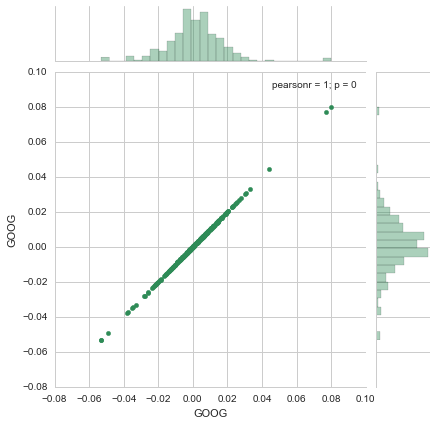

In [25]:
sns.jointplot('GOOG', 'GOOG', tech_rets, kind = 'scatter', color = 'seagreen')

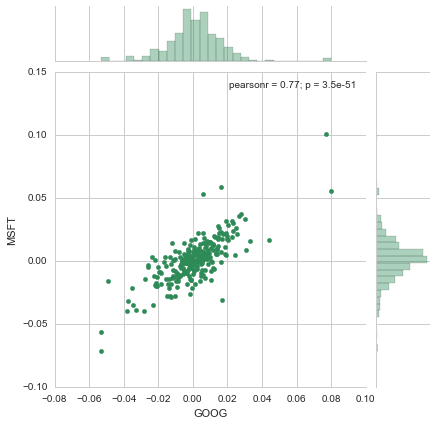

In [26]:
sns.jointplot('GOOG', 'MSFT', tech_rets, kind = 'scatter', color = 'seagreen')

In [27]:
# pearsonr is a parameter about correlation. 1 is positively correlated

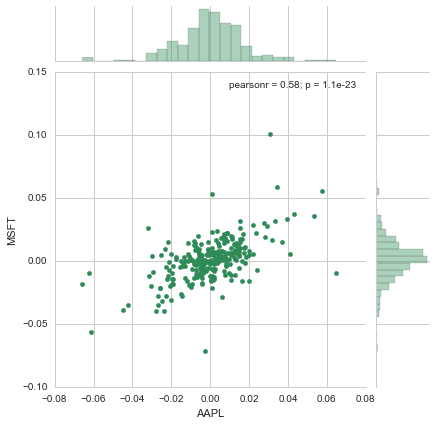

In [28]:
sns.jointplot('AAPL', 'MSFT', tech_rets, kind = 'scatter', color = 'seagreen')

In [29]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-08-18,NaN,NaN,NaN,NaN
2015-08-19,-0.012790,-0.003925,0.007270,-0.013962
2015-08-20,-0.020520,-0.032162,-0.021289,-0.020382
2015-08-21,-0.061163,-0.041316,-0.053105,-0.056724
2015-08-24,-0.024962,-0.062896,-0.037340,-0.032273


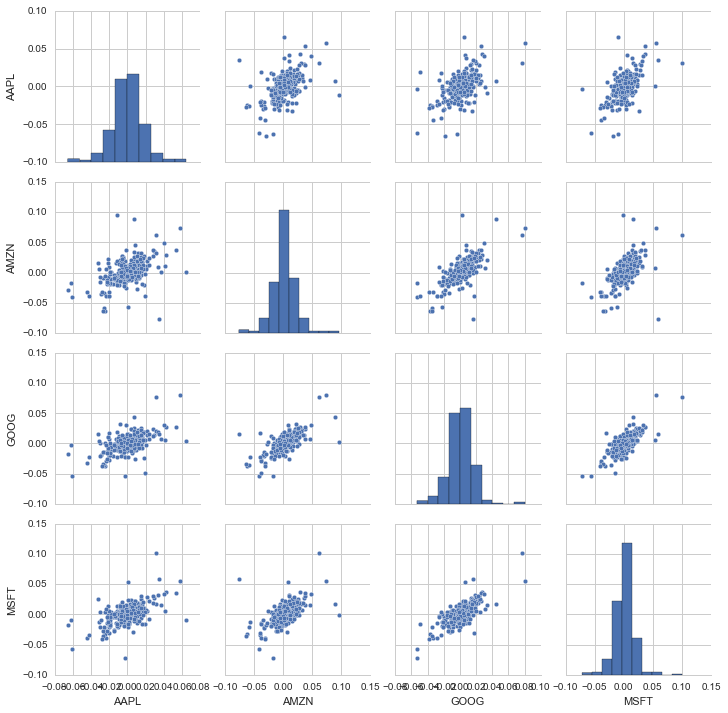

In [30]:
sns.pairplot(tech_rets.dropna())

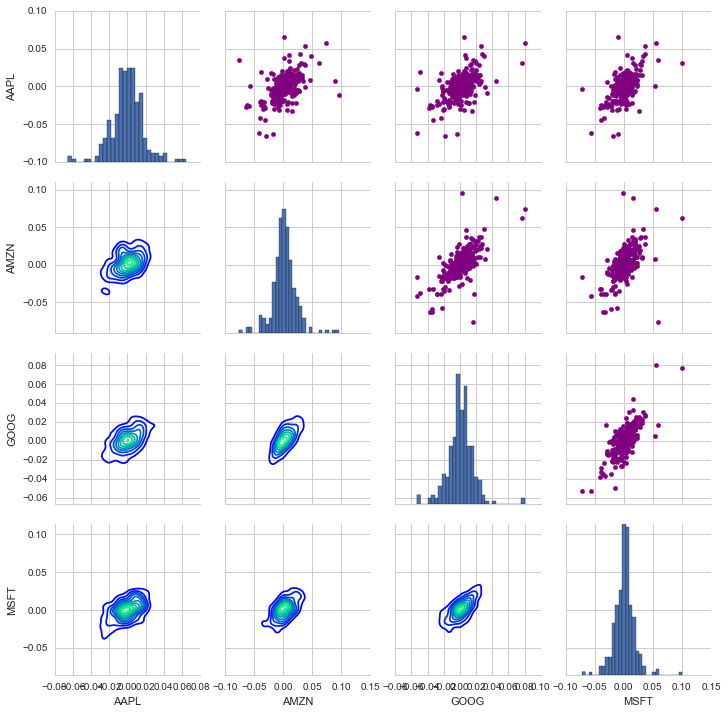

In [31]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter, color = 'purple') #upper right

returns_fig.map_lower(sns.kdeplot, cmap = 'winter') #lower left

returns_fig.map_diag(plt.hist, bins = 30) #diagonal

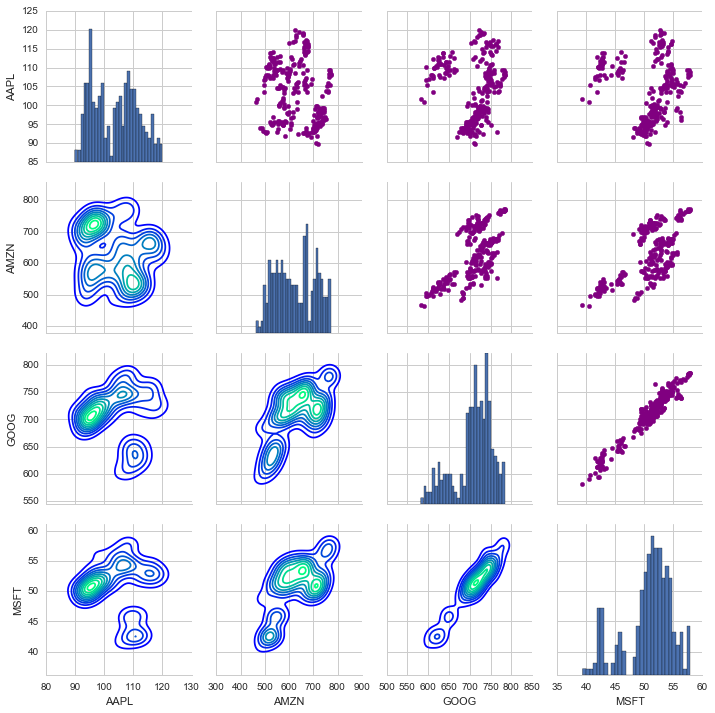

In [32]:
returns_fig = sns.PairGrid(closing_df.dropna())

returns_fig.map_upper(plt.scatter, color = 'purple') #upper right

returns_fig.map_lower(sns.kdeplot, cmap = 'winter') #lower left

returns_fig.map_diag(plt.hist, bins = 30) #diagonal

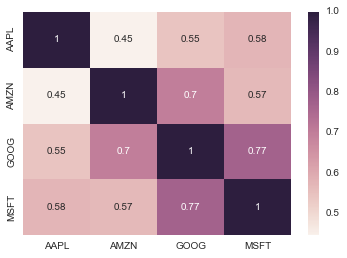

In [33]:
sns.heatmap(tech_rets.dropna().corr(), annot = True) #corrplot

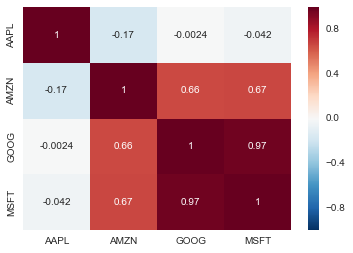

In [34]:
sns.heatmap(closing_df.dropna().corr(), annot = True)

In [35]:
rets = tech_rets.dropna()

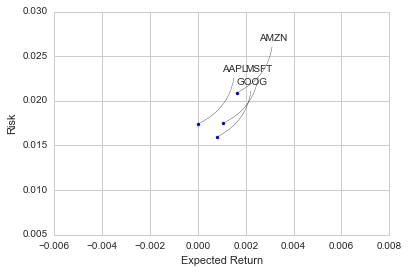

In [36]:
area = np.pi*3 # to define the area for circle for scatter plot (yuvarlaklar için)

plt.scatter(rets.mean(), rets.std(), s = area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

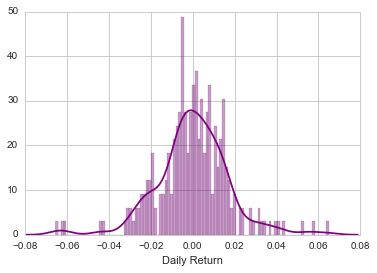

In [37]:
# value at risk (value that we could expect to lose)

# bootstrap method & monte-carlo method

sns.distplot(AAPL['Daily Return'].dropna(), bins = 100, color = 'purple')

In [38]:
rets.head() #daily returns

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-08-19,-0.012790,-0.003925,0.007270,-0.013962
2015-08-20,-0.020520,-0.032162,-0.021289,-0.020382
2015-08-21,-0.061163,-0.041316,-0.053105,-0.056724
2015-08-24,-0.024962,-0.062896,-0.037340,-0.032273
2015-08-25,0.006012,0.006474,-0.012805,-0.029031


In [39]:
rets['AAPL'].quantile(0.05) #0.05 empirical quantile of ret

# bootstrap method

# That means that 0.05 emprical quantile of daily return (%95 confidence)
# our worst daily loss will not exceed the result of it (%2.6)
# So, if we have 1 million dollar investment, %5 value at risk is = $26.000

-0.026223110955925333

In [40]:
# monte-carlo method

days = 365
dt = 1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [41]:
def stock_monte_carlo(start_price, days, mu, sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in xrange(1,days):
        
        shock[x] = np.random.normal(loc=mu*dt, scale = sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [48]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-08-18,661.900024,664.000000,653.460022,656.130005,1456100,656.130005
2015-08-19,656.599976,667.000000,654.190002,660.900024,2131600,660.900024
2015-08-20,655.460022,662.989990,642.900024,646.830017,2855300,646.830017
2015-08-21,639.780029,640.049988,612.330017,612.479980,4265200,612.479980
2015-08-24,573.000000,599.330017,565.049988,589.609985,5770300,589.609985


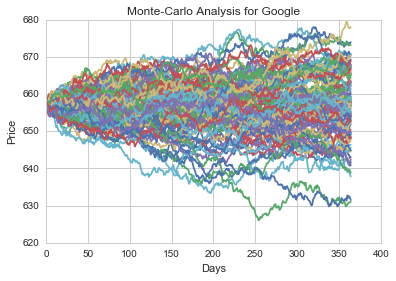

In [43]:
start_price = 656.799988
for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte-Carlo Analysis for Google')

In [49]:
runs = 10000

simulations = np.zeros(runs)

for run in xrange(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]
    


ERROR! Session/line number was not unique in database. History logging moved to new session 351


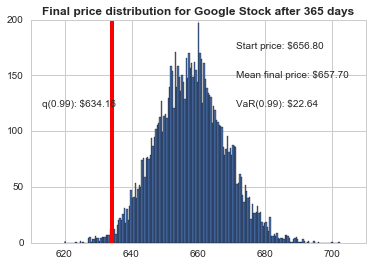

In [50]:
q = np.percentile(simulations, 1)
# %99 percentage output will fit in output

plt.hist(simulations, bins = 200)

plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold')

In [46]:
# Risk is %99 percent of time for each google stock $23.11 (Value at risk)